# Анализа података о епидемији коронавируса

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
os.makedirs('img', exist_ok=True)

Учитавање *COVID-19* података из свих земаља на дневном нивоу. У датотеци `data/covid-worldwide.csv` налази се верзија података која је преузета у јулу 2020. године након чега су подаци за неке дана накнадно кориговани. У другој команди се у променљуви `t_novo` учитава новија верзија истих података. 

In [2]:
t = pd.read_csv('data/covid-worldwide.csv', parse_dates=['dateRep'], dayfirst=True)
t_novo = pd.read_excel('data/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')

У посебној радној свесци [covid-preuzmi-podatke.ipynb](covid-preuzmi-podatke.ipynb) су скрипте за преузимање података, тако да можете да видите и како су подаци преузети. 

Наредна команда приказује неколико првих редова из управо учитане табеле.

In [3]:
t.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-12,12,7,2020,85,16,Afghanistan,AF,AFG,38041757.0,Asia,10.081028
1,2020-07-11,11,7,2020,458,37,Afghanistan,AF,AFG,38041757.0,Asia,10.291323
2,2020-07-10,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
3,2020-07-09,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
4,2020-07-08,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803


Издвојићемо податке за Русију за период од 12. марта до 30. јула 2020. године. За то користимо колону `countriesAndTerritories` где видимо одакле су подаци и колону `dateRep` где видимо од ког датума су подаци. Затим ћемо приказати првих двадесет од тако селектованих редова.

In [4]:
t_russia = t[(t["countriesAndTerritories"] == "Russia") & (t['dateRep'] >= '2020-03-12')  & (t['dateRep'] <= '2020-06-30')].sort_values('dateRep')
t_russia.head(20)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
22496,2020-03-12,12,3,2020,15,0,Russia,RU,RUS,145872260.0,Europe,0.015767
22495,2020-03-13,13,3,2020,5,0,Russia,RU,RUS,145872260.0,Europe,0.019195
22494,2020-03-14,14,3,2020,15,0,Russia,RU,RUS,145872260.0,Europe,0.029478
22493,2020-03-15,15,3,2020,14,0,Russia,RU,RUS,145872260.0,Europe,0.039075
22492,2020-03-16,16,3,2020,4,0,Russia,RU,RUS,145872260.0,Europe,0.041817
22491,2020-03-17,17,3,2020,30,0,Russia,RU,RUS,145872260.0,Europe,0.061698
22490,2020-03-18,18,3,2020,21,0,Russia,RU,RUS,145872260.0,Europe,0.075408
22489,2020-03-19,19,3,2020,33,0,Russia,RU,RUS,145872260.0,Europe,0.098031
22488,2020-03-20,20,3,2020,52,0,Russia,RU,RUS,145872260.0,Europe,0.133679
22487,2020-03-21,21,3,2020,54,0,Russia,RU,RUS,145872260.0,Europe,0.166584


У излистаним редовима табеле можемо приметити нула случајева 24. марта (колона `cases`) и све упућује на то да оних 132 од 23. марта садржи регистроване случајеве од два дана. Ако бисте те у преднодној ћелији ставили `t_novo` уместо `t` видели бисте како изгледа изгледа коригована верзија. Након корекције, је истих 132 регистрованих случајева распоређено на 23. и 24. март.

Издвојићемо серију података која као индекс има датум, а као вредности број регистрованих случајева и приказати првих неколико.

In [5]:
sc = t_russia.set_index('dateRep')["cases"]
sc.head()

dateRep
2020-03-12    15
2020-03-13     5
2020-03-14    15
2020-03-15    14
2020-03-16     4
Name: cases, dtype: int64

Серију `sc` prikazujemo na gafikonu, а исти графикон као слику снимамо у `img/rusija1.png` да бисмо је после користили у тексту лекције о подацима.

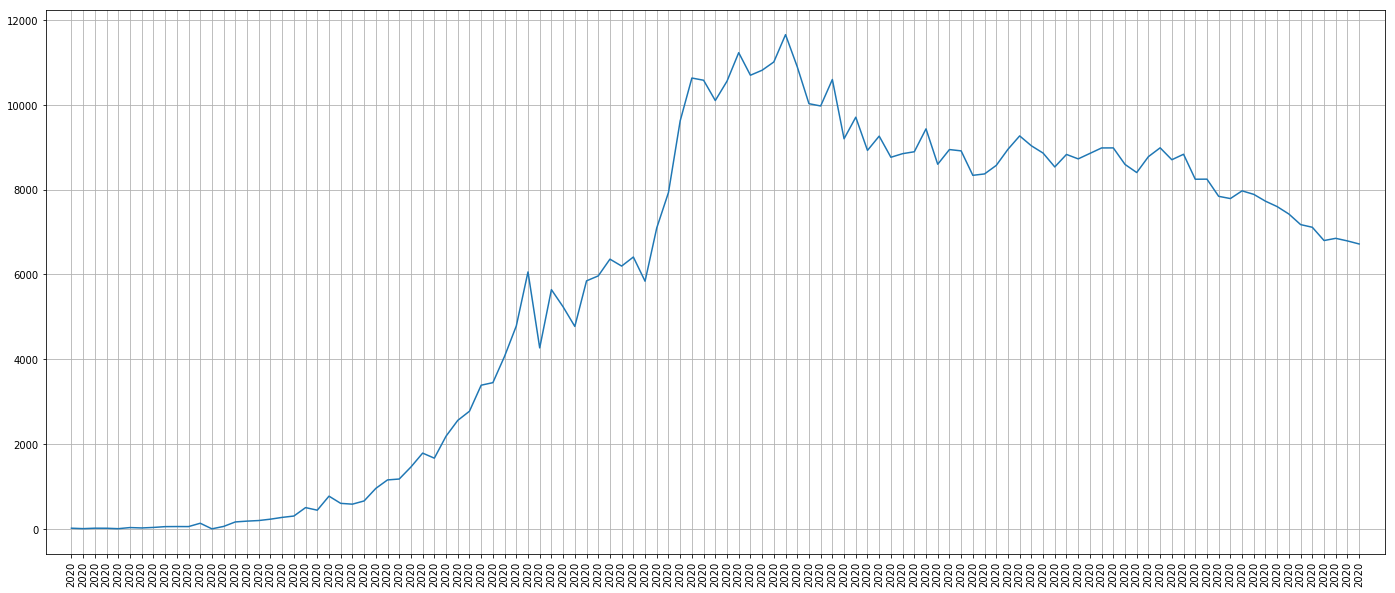

In [6]:
plt.figure(figsize=(24,10))
plt.plot(sc.index, sc)
plt.xticks(sc.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1.png", bbox_inches='tight', dpi=150)
plt.show()

Трансформација којом се поравнавају осцилације тако што се за сваки датум узимају у обзир и суседни.

In [7]:
sc1 =  (sc.shift(-1)* 0.25 + sc * 0.5 + sc.shift(1) * 0.25).dropna()

На сличан начин као претнодно, сада серију `sc1` приказујемо на графикоју и графикон као слику снимамо у датотеку.

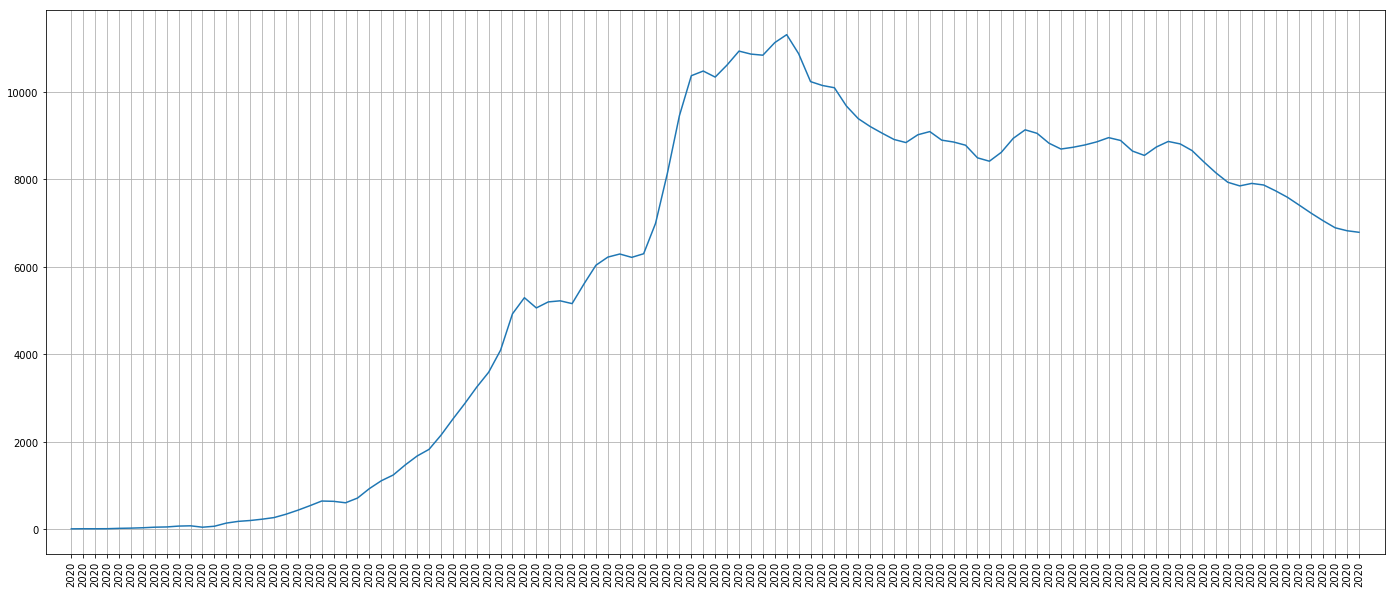

In [8]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1s.png", bbox_inches='tight', dpi=150)
plt.show()

Модификујемо претходни графикон тако што користимо логаритамску расподелу са основом 10 за вертикалу осу

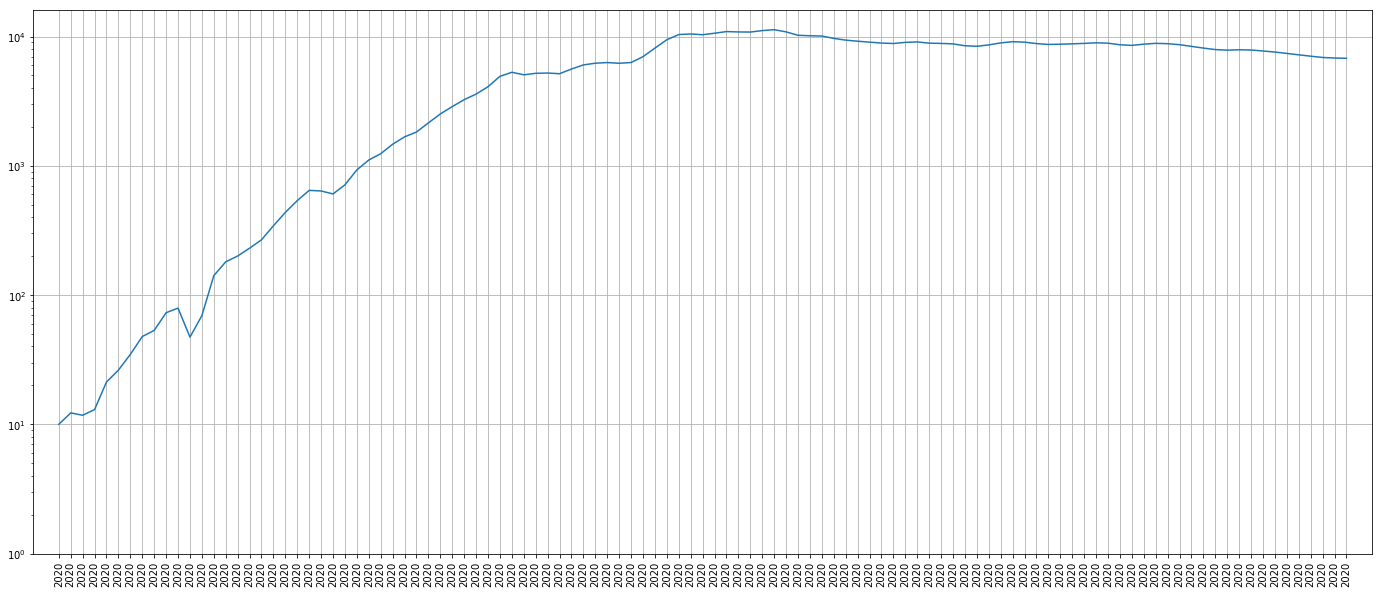

In [9]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.yscale("log")
plt.yticks([10**i for i in range(5)])
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1slog.png", bbox_inches='tight', dpi=150)
plt.show()


Исти графикон, амо са основом 2 у логаритамској расподели

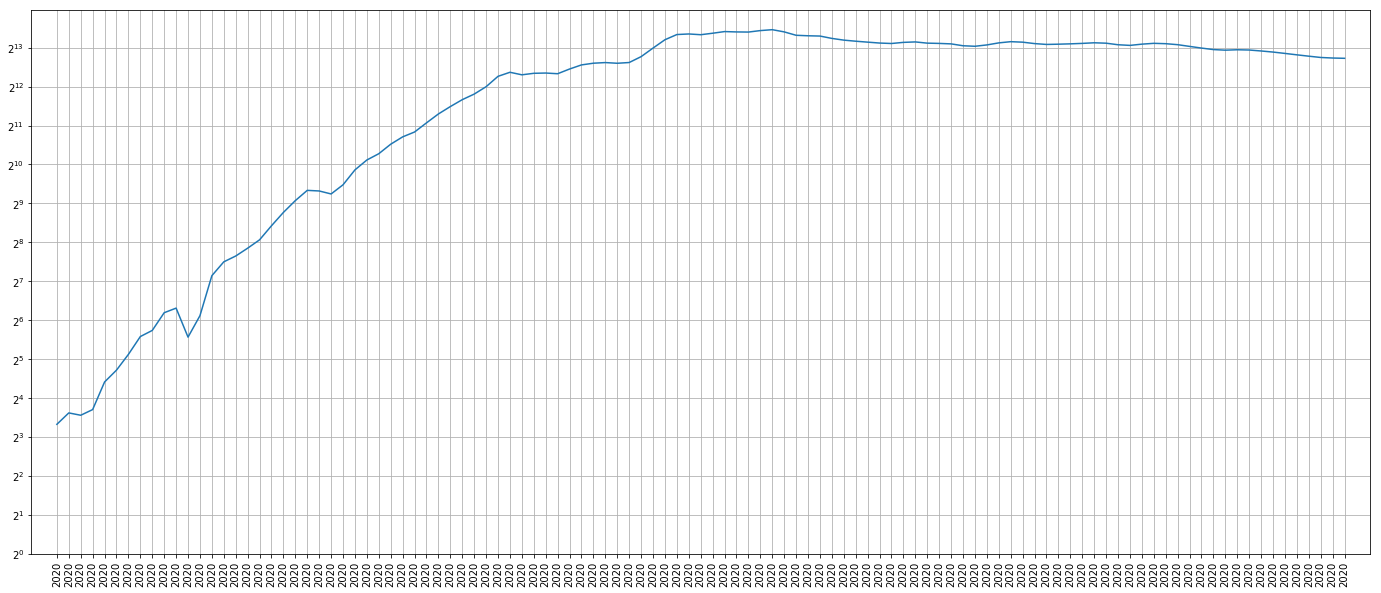

In [10]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.yscale("log", basey=2)
plt.yticks([2**i for i in range(14)])
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1slog2.png", bbox_inches='tight', dpi=150)
plt.show()

In [11]:
## Подаци за Србију

Податке за Србију учитавамо из датотеке `data/serbia-offitial.json`. Ако желите да видите како смо ове отворене податке преузели са портала `covid19.data.gov.rs`, погледајте радну свеску [covid-preuzmi-podatke.ipynb](covid-preuzmi-podatke.ipynb). Такође можете преузети ажуриране податке уколико желите да радите анализу на новијем периоду. 

In [12]:
with open('data/serbia-offitial.json','r',encoding='utf8') as f:
    json_data = json.load(f)

Овде се у једној датотеци налазе разни подаци. У анализи података је чето потребно да се уложи одређен напор како би се из прикупљених података издвојило оно што нам треба за даљу анализу. У наредној ћелији је скрипт који издваја серију са бројем новозаражених по данима. Предност окруженја заснованих на скриптним језицима, као што је *Jupyter*, се управо овде види. Када имамо скрипт лако ћемо ка поново извршити поново касније када будемо преузели пове податке. Такође га можемо лако модификовати за друге серије података које бисмо могли извдојити.

In [13]:
for json_serija in json_data:
    if json_serija["dataCode"] == "BROJ_POZITIVNIH_LICA_ZA_DATI_DATUM":
        v = [stavka["ordinate"] for stavka in json_serija["points"]]
        i = [stavka["abscissa"]["date"] for stavka in json_serija["points"]]
        break

s = pd.Series(v, index=i)

Затим издвајамо део серије за период од 30. августа до 30. септембра 2020. године и формирамо графикон.

In [14]:
s1 = s['2020-08-30':'2020-09-30']

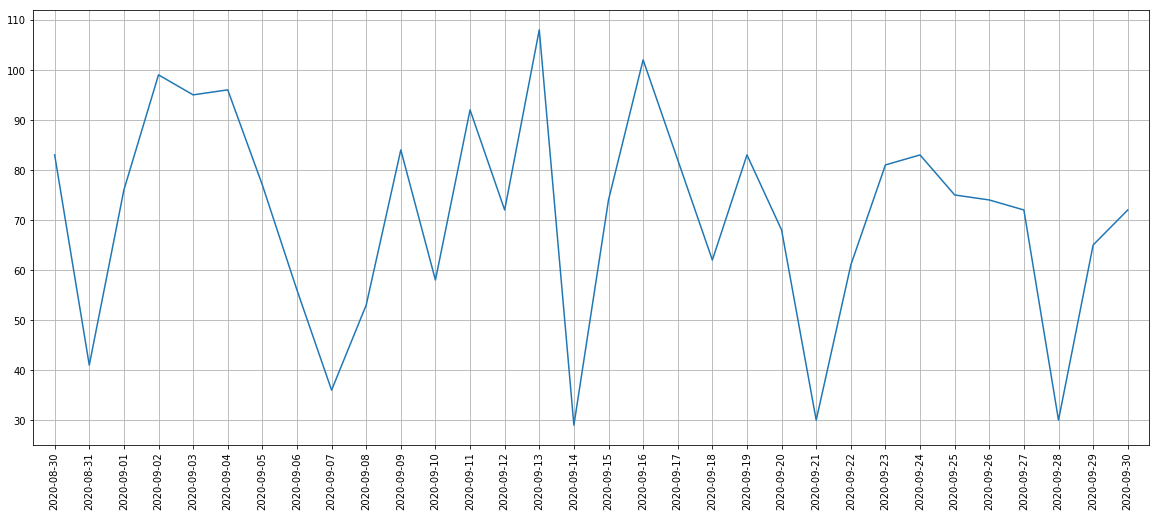

In [15]:
plt.figure(figsize=(20,8))
plt.plot(s1.index, s1)
plt.xticks(s1.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/srbija1.png", bbox_inches='tight', dpi=150)
plt.show()